In [1]:
!wget https://raw.githubusercontent.com/korquad/korquad.github.io/master/dataset/KorQuAD_v1.0_train.json -O KorQuAD_v1.0_train.json

--2024-09-29 22:28:54--  https://raw.githubusercontent.com/korquad/korquad.github.io/master/dataset/KorQuAD_v1.0_train.json
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 38527475 (37M) [text/plain]
저장 위치: ‘KorQuAD_v1.0_train.json’

KorQuAD_v1.0_train. 100%[===================>]  36.74M  9.93MB/s    / 3.7s     

2024-09-29 22:29:01 (10.0 MB/s) - ‘KorQuAD_v1.0_train.json’ 저장함 [38527475/38527475]



In [2]:
!wget https://raw.githubusercontent.com/korquad/korquad.github.io/master/dataset/KorQuAD_v1.0_dev.json -O KorQuAD_v1.0_dev.json

--2024-09-29 22:29:02--  https://raw.githubusercontent.com/korquad/korquad.github.io/master/dataset/KorQuAD_v1.0_dev.json
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 3881058 (3.7M) [text/plain]
저장 위치: ‘KorQuAD_v1.0_dev.json’

KorQuAD_v1.0_dev.js 100%[===================>]   3.70M  10.9MB/s    / 0.3s     

2024-09-29 22:29:04 (10.9 MB/s) - ‘KorQuAD_v1.0_dev.json’ 저장함 [3881058/3881058]



In [266]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json

In [267]:
with open('KorQuAD_v1.0_dev.json', 'r') as f:
    dev_data = json.load(f)

with open('KorQuAD_v1.0_train.json', 'r') as f:
    train_data = json.load(f)


In [268]:
def korquad_to_dataframe(data):
    rows = []
    for paragraph in data['data']:
        paragraph_title = paragraph['title']

        for qa in paragraph['paragraphs']:
            context = qa['context']

            for question in qa['qas']:
                q = question['question']
                qa_id = question['id']

                for answer in question['answers']:
                    a = answer['text']
                    rows.append({
                        'question': q,
                        'answer': a,
                        'qa_id': qa_id,
                        'context': context,
                        'paragraph_title': paragraph_title
                    })

    return pd.DataFrame(rows)

In [269]:
df_dev = korquad_to_dataframe(dev_data)
print(df_dev.shape)
df_dev.head()

(5774, 5)


,question,answer,qa_id,context,paragraph_title
0,임종석이 여의도 농민 폭력 시위를 주도한 혐의로 지명수배 된 날은?,1989년 2월 15일,6548850-0-0,1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률...,임종석
1,1989년 6월 30일 평양축전에 대표로 파견 된 인물은?,임수경,6548850-0-1,1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률...,임종석
2,임종석이 여의도 농민 폭력 시위를 주도한 혐의로 지명수배된 연도는?,1989년,6548853-0-0,1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률...,임종석
3,임종석을 검거한 장소는 경희대 내 어디인가?,학생회관 건물 계단,6548853-0-1,1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률...,임종석
4,임종석이 조사를 받은 뒤 인계된 곳은 어딘가?,서울지방경찰청 공안분실,6548853-0-2,1989년 2월 15일 여의도 농민 폭력 시위를 주도한 혐의(폭력행위등처벌에관한법률...,임종석


In [270]:
df_train = korquad_to_dataframe(train_data)
print(df_train.shape)
df_train.head()

(60407, 5)


,question,answer,qa_id,context,paragraph_title
0,바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?,교향곡,6566495-0-0,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트_서곡
1,바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?,1악장,6566495-0-1,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트_서곡
2,바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?,베토벤의 교향곡 9번,6566495-0-2,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트_서곡
3,1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?,파우스트,6566518-0-0,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트_서곡
4,파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?,합창교향곡,6566518-0-1,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트_서곡


In [271]:
df_train = df_train[['question', 'context', 'answer']]
df_dev = df_dev[['question', 'context', 'answer']]

df = pd.concat([df_train, df_dev], axis=0).reset_index(drop=True)
df.isnull().value_counts()

question  context  answer
False     False    False     66181
Name: count, dtype: int64

In [272]:
from unsloth import FastLanguageModel
import torch

max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-3B-Instruct", # or choose "unsloth/Llama-3.2-1B-Instruct"
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

==((====))==  Unsloth 2024.9.post3: Fast Llama patching. Transformers = 4.45.1.
   \\   /|    GPU: NVIDIA GeForce RTX 3090. Max memory: 23.688 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1. CUDA = 8.6. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth


In [273]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

In [274]:
model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(128256, 3072)
        (layers): ModuleList(
          (0-27): 28 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=3072, out_features=3072, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Identity()
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=3072, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=3072, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): lora.Linear4bit(
      

In [275]:
from unsloth.chat_templates import get_chat_template

tokenizer = get_chat_template(
    tokenizer,
    chat_template = "llama-3.1",
)

def format_example(row):
    prompt = f"""{row["question"]}

Information

###
{row["context"]}
###"""

    messages = [
        {
            "role": "system",
            "content": "Use only the information to answer the question"
        },
        {"role": "user", "content": prompt},
        {"role": "assistant", "content": row["answer"]}
    ]

    return tokenizer.apply_chat_template(messages, tokenize=False)

In [276]:
df['text'] = df.apply(format_example, axis=1)

In [277]:
df.head()

,question,context,answer,text
0,바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,교향곡,<|begin_of_text|><|start_header_id|>system<|en...
1,바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,1악장,<|begin_of_text|><|start_header_id|>system<|en...
2,바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,베토벤의 교향곡 9번,<|begin_of_text|><|start_header_id|>system<|en...
3,1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트,<|begin_of_text|><|start_header_id|>system<|en...
4,파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,합창교향곡,<|begin_of_text|><|start_header_id|>system<|en...


In [278]:
# system 프롬프트에 
# Cutting Knowledge Date: December 2023
# Today Date: 26 July 2024 가 추가되어 llama 3.1 프롬프트 탬플릿임을 확인

print(df.loc[0,'text'])

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Use only the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?

Information

###
1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다.
###<|eot_id|><|start_header_id|>assistant<|end_header

In [279]:
def count_tokens(row):
    return len(
        tokenizer(
            row['text'],
            add_special_tokens=True,
            return_attention_mask=False
        )["input_ids"]
    )

In [280]:
%%time
df["token_count"] = df.apply(count_tokens, axis=1)

CPU times: user 29.5 s, sys: 0 ns, total: 29.5 s
Wall time: 29.5 s


In [281]:
df.head()

,question,context,answer,text,token_count
0,바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,교향곡,<|begin_of_text|><|start_header_id|>system<|en...,511
1,바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,1악장,<|begin_of_text|><|start_header_id|>system<|en...,510
2,바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,베토벤의 교향곡 9번,<|begin_of_text|><|start_header_id|>system<|en...,520
3,1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트,<|begin_of_text|><|start_header_id|>system<|en...,509
4,파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,합창교향곡,<|begin_of_text|><|start_header_id|>system<|en...,514


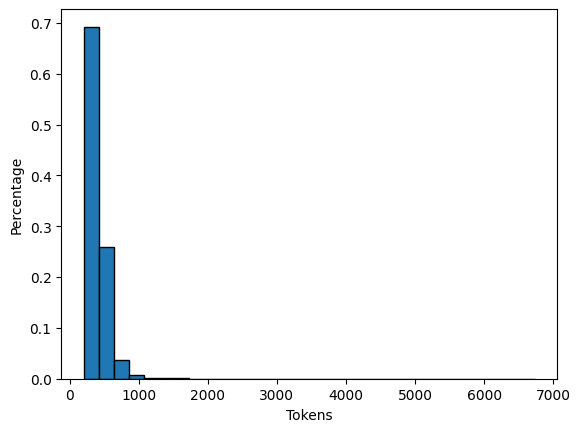

In [282]:
plt.hist(df['token_count'], ec='k', bins=30, weights=np.ones(len(df['token_count'])) / len(df['token_count']) )
plt.xlabel("Tokens")
plt.ylabel("Percentage")
plt.show()

In [283]:
len(df[df['token_count'] < 512]), len(df), len(df[df['token_count'] < 512]) / len(df)

(57139, 66181, 0.8633746845771445)

In [284]:
SEED = 42

# def seed_everything(seed: int):
#     random.seed(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)

# seed_everything(SEED)

In [285]:
# 토큰 길이로 적당히 학습 샘플 서브샘플링 
df_sampled = df[df["token_count"] < 512]
df_sampled = df_sampled.sample(6000, random_state=SEED)
df_sampled.shape

(6000, 5)

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
train, temp = train_test_split(df_sampled, test_size=0.2, random_state=SEED)
val, test = train_test_split(temp, test_size=0.2, random_state=SEED)

In [288]:
print(f"Train data ratio:{len(train) / len(df_sampled)}, {len(train)}")
print(f"Valid data ratio:{len(val) / len(df_sampled)}, {len(val)}")
print(f"Test data ratio:{len(test) / len(df_sampled)}, {len(test)}")

Train data ratio:0.8, 4800
Valid data ratio:0.16, 960
Test data ratio:0.04, 240


In [289]:
train.sample(n=4000, random_state=SEED).to_json("train.json", orient="records", lines=True)
val.sample(n=500, random_state=SEED).to_json("val.json", orient="records", lines=True)
test.sample(n=100, random_state=SEED).to_json("test.json", orient="records", lines=True)

In [290]:
from datasets import load_dataset

dataset = load_dataset(
    "json",
    data_files={
        "train": "train.json",
        "validation": "val.json",
        "test": "test.json"
    }
)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [291]:
dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'context', 'answer', 'text', 'token_count'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['question', 'context', 'answer', 'text', 'token_count'],
        num_rows: 500
    })
    test: Dataset({
        features: ['question', 'context', 'answer', 'text', 'token_count'],
        num_rows: 100
    })
})

In [292]:
def create_test_prompt(data_row):
    prompt = f"""{data_row["question"]}

Information

###
{data_row["context"]}
###"""

    messages = [
        {
            "role": "system",
            "content": "Use only the information to answer the question"
        },
        {"role": "user", "content": prompt},
    ]

    return tokenizer.apply_chat_template(
        messages, tokenize=False,
        # 프롬프트 끝에
        # <|start_header_id|>assistant<|end_header_id|>
        # 를 붙이게 됨
        add_generation_prompt=True
    )

In [302]:
# 테스트 셋에 대해서 학습전 출력을 확인

def inf_test_one_sample(example):
    prompt = create_test_prompt(example)
    print("\nPROMPT\n", prompt.strip())
    
    inputs = torch.tensor([tokenizer(prompt)['input_ids']]).to('cuda')

    outputs = model.generate(input_ids = inputs, max_new_tokens = 64, use_cache = True,
                         temperature = 1.5, min_p = 0.1)

    print("\nANS\n", example['answer'])
    print("\nPRED\n", tokenizer.batch_decode(outputs)[0].split('<|start_header_id|>assistant<|end_header_id|>')[1].strip())

    return example['answer'], tokenizer.batch_decode(outputs)[0].split('<|start_header_id|>assistant<|end_header_id|>')[1].strip()

FastLanguageModel.for_inference(model);

untrained = []


In [303]:
untrained.append(
    inf_test_one_sample(dataset['test'][0])
)


PROMPT
 <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Use only the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

니노이 아키노 국제공항이 처음으로 국내선을 운영한 시기는?

Information

###
터미널 공식적으로 선택한 국내선으로 2008년 7월 22일(처음에는 세부 퍼시픽만, 그 필리핀 항공의 자회사 항공 필리핀과 PAL 익스프레스)에서, 세부 퍼시픽과 함께 문을 열었다. 국제선은 8월 1일 2008년이다. PAL에서 제외한 모든 국제 작전에서 사용하는 3번 터미널에서 미래에 운영하고, 원래에서 움직이겠다는 제안을 위한 것이다.그의 처음 2년 동안 2010년, 하지만 국내 항공사 세부 퍼시픽과 에어 필 익스프레스(그 항공 필리핀 그리고 그들은 PAL 익스프레스)의 4분기 남아 있는 유일한 세입자들이다. 작동 국제선의 대부분은 터미널 1부터 전 일본 항공은 첫 외국계 항공사 터미널 3은 2월 27일에 운영되는 것을 제외하고 운영되고 있다.
###<|eot_id|><|start_header_id|>assistant<|end_header_id|>

ANS
 2008년 7월 22일

PRED
 니노이 아키노 국제공항이 처음으로 domestically 선을 운영한 시기는 2008년 7월 22일에, 2008년 8월 1日に 국제선을 운영하기 시작했다.<|eot_id|>


In [304]:
untrained.append(
    inf_test_one_sample(dataset['test'][1])
)


PROMPT
 <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Use only the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

주한일본공사의 스즈키는 누구를 카라와 함께 일본의 신한류를 이끄는 그룹이라 언급했는가?

Information

###
소녀시대는 한류를 이끄는 주역으로도 인정 받고 있다. 주한일본공사 스즈키 히로시는 이들을 카라와 함께 일본의 신한류를 이끄는 그룹이라고 말했으며, 《경향신문》에서는 "소녀시대는 대중문화의 아이콘, 아시아를 넘어 유럽까지 진출한 한류의 선두주자가 됐다"라며 "한류 열풍 이끄는 아시아 최고 걸그룹"이라고 말했다. 브라질의 연예 프로그램인 ‘Leitura Dinamica’는 브라질의 k-pop 열풍을 소개하며 소녀시대를 예로 들며, “신곡 ‘훗’은 브라질 뿐 아니라 세계 유명 DJ들에게도 큰 인기다. 그야말로 소녀시대가 쏜 화살이 아시아를 넘어 세계로 날아가고 있는 셈”이라고 호평했다. 또 아리랑TV가 연 ‘K POP - 따라하기’에서 가장 많이 패러디된 가수는 소녀시대였으며, 인도네시아 팬들은 소녀시대의 라이브 공연을 자국에서 해 달라고 서명 운동을 벌이기도 했다. 소시지룩, 마린룩 등 패션은 대한민국에서 인기를 끌었으며, 특히 후루야 마사유키는 그들이 일본 젊은 여성들의 패션 아이콘이라고 말했다. 또한 일본 영어 교과서에 “전 세계에서 인기를 얻고 있는 K-pop 스타들”이라는 제목으로 K-pop의 대표로 소녀시대를 소개하며 사진이 삽입되었다. KIIS의 음악 감독인 줄리 필랏 (Julie Pilat)은 2012년 주목할 그룹으로 뽑기도 했다.
###<|eot_id|><|start_header_id|>assistant<|end_head

In [305]:
untrained.append(
    inf_test_one_sample(dataset['test'][2])
)


PROMPT
 <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Use only the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

변희재가 운영했던 인터넷사이트는?

Information

###
2003년 2월 12일 KBS 신임 사장 인선 관련 공청회에 참여했을 때는 코드 인사, 낙하산 인사가 아닌 방송을 잘 아는 인물이 선임되어야 한다는 견해를 피력하였다. 당시 인터넷사이트 '서프라이즈' 운영자였던 변희재는 "KBS 사장은 늘 '지사풍'의 언론인이 와야 한다는 강박관념이 잘못된 인선을 부른다"며 "지금 이 자리에서 언급되고 있는 언론인 정모씨나 강모 교수가 사장으로 선임이 된다고 해도 보도국과 교양프로만 챙기는 사장이 될 것이다. 언론인 중 방송을 아는 인물이 와서 현재 문제가 많은 오락프로 등도 개선해야 할 것"이라고 밝혔다. 그는 또 "시청률에 대한 부담이 상대적으로 덜한 KBS는 이제 '공정성'이라는 말보다는 '실험성'을 강조해야 할 것"이라고 강조했다.
###<|eot_id|><|start_header_id|>assistant<|end_header_id|>

ANS
 서프라이즈

PRED
 변희재는 서프라이즈(이론적意义에서 보도용의로 보는가? ) 운영자 였다.<|eot_id|>


In [307]:
untrained.append(
    inf_test_one_sample(dataset['test'][3])
)


PROMPT
 <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Use only the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

어디서 개복치를 식용으로 파는것을 금지하는가?

Information

###
한국과 일본, 대만에서는 식용으로 먹기도 하는데 몸체의 대부분을 먹을 수 있다. 맛과 모양은 기름기가 많아 하얗고 뽀얀 편이라 참치 흰살과 비슷하다. 회로 먹기도 하는데 비린내가 안 나는 편이나 기름이 소화가 잘 안 돼, 많이 먹으면 설사를 유발하기도 한다. 등 쪽에서 나오는 흰색의 창자는 중국에선 용창이라는 이름으로 별미로 여겨지기도 하며 지느러미를 몸통의 살보다 별미로 취급한다. 껍질은 삶으면 흐물흐물해지는데, 이것을 우뭇가사리와 비슷하게 만들어 먹을 수 있다. 어떤 지역에서는 약재로 쓰이기도 한다. 대한민국에서는 포항 지역에서 개복치를 대소사에 쓰이는 별미 재료로 사용해 왔다. 구체적으로 껍질은 수육, 뱃살은 회무침용, 머리뼈와 머릿살은 찜 요리 재료로 사용한다. 근육 부분은 갈아서 부산 어묵에 들어가는 경우도 있다. 한편 유럽 연합에서는 개복치를 식용으로 파는 것이 금지되어 있다.
###<|eot_id|><|start_header_id|>assistant<|end_header_id|>

ANS
 유럽 연합

PRED
 유럽 연합<|eot_id|>


In [308]:
untrained

[('2008년 7월 22일',
  '니노이 아키노 국제공항이 처음으로 domestically 선을 운영한 시기는 2008년 7월 22일에, 2008년 8월 1日に 국제선을 운영하기 시작했다.<|eot_id|>'),
 ('소녀시대',
  '소녀시대가 주한일본공사의 스즈키 히로시는 카라와 함께 일본의 신한류를 이끄는 그룹이라고 언급했었습니다.<|eot_id|>'),
 ('서프라이즈', '변희재는 서프라이즈(이론적意义에서 보도용의로 보는가? ) 운영자 였다.<|eot_id|>'),
 ('유럽 연합', '유럽 연합<|eot_id|>')]

In [309]:
FastLanguageModel.for_training(model);

In [310]:
from trl import SFTTrainer
from transformers import TrainingArguments, DataCollatorForSeq2Seq
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset=dataset["train"],
    eval_dataset=dataset["validation"],
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    data_collator = DataCollatorForSeq2Seq(tokenizer = tokenizer),
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        num_train_epochs = 1, # Set this for 1 full training run.
        # max_steps = 60,
        learning_rate = 1e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        eval_strategy="steps",
        eval_steps=0.2,
        save_steps=0.2,
    ),
)

Map (num_proc=2):   0%|          | 0/4000 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/500 [00:00<?, ? examples/s]

In [311]:
# 학습을 위한 로스의 계산은 입력 프롬프트 제외하고 출력 부분만 해당되므로
# 입력과 출력 부분을 구분하기 위해 구분자를 세팅
from unsloth.chat_templates import train_on_responses_only

trainer = train_on_responses_only(
    trainer,
    instruction_part = "<|start_header_id|>user<|end_header_id|>\n\n",
    response_part = "<|start_header_id|>assistant<|end_header_id|>\n\n",
)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [312]:
print( tokenizer.decode(trainer.train_dataset[5]["input_ids"]) )

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Use only the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

아이폰을 도입한 이후 불화가 일기 시작한 두 기업은 어디인가?

Information

###
아이폰을 도입한 이후로 KT와 삼성전자간의 불화가 일기 시작하였다. 아이폰 출시로 인해 스마트폰 부분에서 삼성은 매출과 이미지에 타격을 입었으며, 삼성의 대표적인 스마트폰인 옴니아2의 만족도 조사와, 스마트폰 선호도 조사에서 삼성은 애플에 크게 떨어져 굴욕을 맛보아야 했다. 삼성은 그에 따라 KT에 대한 불편한 심기를 감추지 않았으며, 이후 삼성의 각종 스마트폰 출시에서 KT가 제외되거나, 보조금 지급 대상에서 제외되거나, 업그레이드를 해주지 않거나, 심지어 '쇼옴니아' 명칭 조차 사용할 수 없게 하는 등 KT에 대한 삼성의 차별이 시작되었다. KT는 아이폰을 출시함으로 인해 큰 영향력을 행사하는 계기가 되었으나, 대한민국 최대 휴대 전화 제조사인 삼성과의 불화로 인해 대한민국의 스마트폰을 원활하게 확보하기가 어렵게 되는 위기에 처하기도 하였다. 이후 SK텔레콤을 통해서 출시된 삼성의 스마트폰 '갤럭시' 시리즈도 몇개월 이상 지나서 KT에서 출시되었으며 삼성의 '바다' 운영 체제를 탑재한 '웨이브2'는 KT에서 아예 출시 할 계획이 없는 것으로 알려졌다. 이와는 별개로 웨이브3는 KT에 정상적으로 출시되었다.
###<|eot_id|><|start_header_id|>assistant<|end_header_id|>

KT와 삼성전자<|eot_id|>


In [313]:
# trainer.train_dataset의 labels에는 instruction에 해당하는 입력부분은 모두 -100으로
# 마스킹됨을 확인
space = tokenizer(" ", add_special_tokens = False).input_ids[0]
print( tokenizer.decode([space if x == -100 else x for x in trainer.train_dataset[5]["labels"]]) )

                                                                                                                                                                                                                                                                                                                                                                                                              

KT와 삼성전자<|eot_id|>


In [314]:
# 학습 시작
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 4,000 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 500
 "-____-"     Number of trainable parameters = 24,313,856


  0%|          | 0/500 [00:00<?, ?it/s]

{'loss': 1.7036, 'grad_norm': 9.051045417785645, 'learning_rate': 2e-05, 'epoch': 0.0}
{'loss': 1.523, 'grad_norm': 7.179967880249023, 'learning_rate': 4e-05, 'epoch': 0.0}
{'loss': 1.8045, 'grad_norm': 5.704689979553223, 'learning_rate': 6e-05, 'epoch': 0.01}
{'loss': 1.8835, 'grad_norm': 7.906423091888428, 'learning_rate': 8e-05, 'epoch': 0.01}
{'loss': 1.5441, 'grad_norm': 8.5809965133667, 'learning_rate': 0.0001, 'epoch': 0.01}
{'loss': 1.3954, 'grad_norm': 10.389257431030273, 'learning_rate': 9.97979797979798e-05, 'epoch': 0.01}
{'loss': 0.4933, 'grad_norm': 4.006084442138672, 'learning_rate': 9.95959595959596e-05, 'epoch': 0.01}
{'loss': 0.5702, 'grad_norm': 2.750704526901245, 'learning_rate': 9.939393939393939e-05, 'epoch': 0.02}
{'loss': 0.5063, 'grad_norm': 2.4367377758026123, 'learning_rate': 9.919191919191919e-05, 'epoch': 0.02}
{'loss': 0.3837, 'grad_norm': 3.509213447570801, 'learning_rate': 9.8989898989899e-05, 'epoch': 0.02}
{'loss': 0.7336, 'grad_norm': 4.15853977203369

  0%|          | 0/63 [00:00<?, ?it/s]

{'eval_loss': 0.2724214494228363, 'eval_runtime': 31.6286, 'eval_samples_per_second': 15.808, 'eval_steps_per_second': 1.992, 'epoch': 0.2}
{'loss': 0.2842, 'grad_norm': 13.598481178283691, 'learning_rate': 8.060606060606061e-05, 'epoch': 0.2}
{'loss': 0.4501, 'grad_norm': 3.662079095840454, 'learning_rate': 8.040404040404041e-05, 'epoch': 0.2}
{'loss': 0.1179, 'grad_norm': 1.589817762374878, 'learning_rate': 8.02020202020202e-05, 'epoch': 0.21}
{'loss': 0.125, 'grad_norm': 2.702413320541382, 'learning_rate': 8e-05, 'epoch': 0.21}
{'loss': 0.4187, 'grad_norm': 2.935258150100708, 'learning_rate': 7.97979797979798e-05, 'epoch': 0.21}
{'loss': 0.5465, 'grad_norm': 3.196913957595825, 'learning_rate': 7.95959595959596e-05, 'epoch': 0.21}
{'loss': 0.1124, 'grad_norm': 2.75850510597229, 'learning_rate': 7.93939393939394e-05, 'epoch': 0.21}
{'loss': 0.0944, 'grad_norm': 0.9826244115829468, 'learning_rate': 7.919191919191919e-05, 'epoch': 0.22}
{'loss': 0.0516, 'grad_norm': 1.33893620967865, 'l

  0%|          | 0/63 [00:00<?, ?it/s]

{'eval_loss': 0.22132696211338043, 'eval_runtime': 31.8311, 'eval_samples_per_second': 15.708, 'eval_steps_per_second': 1.979, 'epoch': 0.4}
{'loss': 0.043, 'grad_norm': 0.9014453887939453, 'learning_rate': 6.040404040404041e-05, 'epoch': 0.4}
{'loss': 0.0977, 'grad_norm': 2.2420949935913086, 'learning_rate': 6.02020202020202e-05, 'epoch': 0.4}
{'loss': 0.2667, 'grad_norm': 3.604114055633545, 'learning_rate': 6e-05, 'epoch': 0.41}
{'loss': 0.5034, 'grad_norm': 4.343308925628662, 'learning_rate': 5.97979797979798e-05, 'epoch': 0.41}
{'loss': 0.1976, 'grad_norm': 2.286811113357544, 'learning_rate': 5.959595959595959e-05, 'epoch': 0.41}
{'loss': 0.324, 'grad_norm': 3.273556709289551, 'learning_rate': 5.93939393939394e-05, 'epoch': 0.41}
{'loss': 0.2518, 'grad_norm': 2.502521514892578, 'learning_rate': 5.91919191919192e-05, 'epoch': 0.41}
{'loss': 0.109, 'grad_norm': 3.106017589569092, 'learning_rate': 5.8989898989898996e-05, 'epoch': 0.42}
{'loss': 0.1586, 'grad_norm': 2.0380759239196777,

  0%|          | 0/63 [00:00<?, ?it/s]

{'eval_loss': 0.2025824934244156, 'eval_runtime': 32.0774, 'eval_samples_per_second': 15.587, 'eval_steps_per_second': 1.964, 'epoch': 0.6}
{'loss': 0.2745, 'grad_norm': 3.250603437423706, 'learning_rate': 4.0202020202020204e-05, 'epoch': 0.6}
{'loss': 0.026, 'grad_norm': 0.6206432580947876, 'learning_rate': 4e-05, 'epoch': 0.6}
{'loss': 0.031, 'grad_norm': 0.5821423530578613, 'learning_rate': 3.97979797979798e-05, 'epoch': 0.61}
{'loss': 0.2898, 'grad_norm': 6.44357442855835, 'learning_rate': 3.9595959595959594e-05, 'epoch': 0.61}
{'loss': 0.2734, 'grad_norm': 2.770169496536255, 'learning_rate': 3.939393939393939e-05, 'epoch': 0.61}
{'loss': 0.4613, 'grad_norm': 2.5390465259552, 'learning_rate': 3.91919191919192e-05, 'epoch': 0.61}
{'loss': 0.0785, 'grad_norm': 0.9323313236236572, 'learning_rate': 3.898989898989899e-05, 'epoch': 0.61}
{'loss': 0.0381, 'grad_norm': 1.109047293663025, 'learning_rate': 3.878787878787879e-05, 'epoch': 0.62}
{'loss': 0.3027, 'grad_norm': 2.4068987369537354

  0%|          | 0/63 [00:00<?, ?it/s]

{'eval_loss': 0.183831587433815, 'eval_runtime': 32.2403, 'eval_samples_per_second': 15.509, 'eval_steps_per_second': 1.954, 'epoch': 0.8}
{'loss': 0.0471, 'grad_norm': 1.891419529914856, 'learning_rate': 2e-05, 'epoch': 0.8}
{'loss': 0.0643, 'grad_norm': 0.9776850342750549, 'learning_rate': 1.9797979797979797e-05, 'epoch': 0.8}
{'loss': 0.1155, 'grad_norm': 1.8125966787338257, 'learning_rate': 1.95959595959596e-05, 'epoch': 0.81}
{'loss': 0.0845, 'grad_norm': 2.1320297718048096, 'learning_rate': 1.9393939393939395e-05, 'epoch': 0.81}
{'loss': 0.2836, 'grad_norm': 3.260908842086792, 'learning_rate': 1.919191919191919e-05, 'epoch': 0.81}
{'loss': 0.0498, 'grad_norm': 0.8785823583602905, 'learning_rate': 1.898989898989899e-05, 'epoch': 0.81}
{'loss': 0.0532, 'grad_norm': 0.8955144286155701, 'learning_rate': 1.878787878787879e-05, 'epoch': 0.81}
{'loss': 0.1276, 'grad_norm': 1.9700326919555664, 'learning_rate': 1.8585858585858588e-05, 'epoch': 0.82}
{'loss': 0.2541, 'grad_norm': 1.7219291

  0%|          | 0/63 [00:00<?, ?it/s]

{'eval_loss': 0.1790277063846588, 'eval_runtime': 32.5333, 'eval_samples_per_second': 15.369, 'eval_steps_per_second': 1.936, 'epoch': 1.0}
{'train_runtime': 1071.3587, 'train_samples_per_second': 3.734, 'train_steps_per_second': 0.467, 'train_loss': 0.21978609014302491, 'epoch': 1.0}


In [315]:
trained = []

FastLanguageModel.for_inference(model);

In [316]:
trained.append(
    inf_test_one_sample(dataset['test'][0])
)


PROMPT
 <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Use only the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

니노이 아키노 국제공항이 처음으로 국내선을 운영한 시기는?

Information

###
터미널 공식적으로 선택한 국내선으로 2008년 7월 22일(처음에는 세부 퍼시픽만, 그 필리핀 항공의 자회사 항공 필리핀과 PAL 익스프레스)에서, 세부 퍼시픽과 함께 문을 열었다. 국제선은 8월 1일 2008년이다. PAL에서 제외한 모든 국제 작전에서 사용하는 3번 터미널에서 미래에 운영하고, 원래에서 움직이겠다는 제안을 위한 것이다.그의 처음 2년 동안 2010년, 하지만 국내 항공사 세부 퍼시픽과 에어 필 익스프레스(그 항공 필리핀 그리고 그들은 PAL 익스프레스)의 4분기 남아 있는 유일한 세입자들이다. 작동 국제선의 대부분은 터미널 1부터 전 일본 항공은 첫 외국계 항공사 터미널 3은 2월 27일에 운영되는 것을 제외하고 운영되고 있다.
###<|eot_id|><|start_header_id|>assistant<|end_header_id|>

ANS
 2008년 7월 22일

PRED
 2008년 8월 1일<|eot_id|>


In [317]:
trained.append(
    inf_test_one_sample(dataset['test'][1])
)


PROMPT
 <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Use only the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

주한일본공사의 스즈키는 누구를 카라와 함께 일본의 신한류를 이끄는 그룹이라 언급했는가?

Information

###
소녀시대는 한류를 이끄는 주역으로도 인정 받고 있다. 주한일본공사 스즈키 히로시는 이들을 카라와 함께 일본의 신한류를 이끄는 그룹이라고 말했으며, 《경향신문》에서는 "소녀시대는 대중문화의 아이콘, 아시아를 넘어 유럽까지 진출한 한류의 선두주자가 됐다"라며 "한류 열풍 이끄는 아시아 최고 걸그룹"이라고 말했다. 브라질의 연예 프로그램인 ‘Leitura Dinamica’는 브라질의 k-pop 열풍을 소개하며 소녀시대를 예로 들며, “신곡 ‘훗’은 브라질 뿐 아니라 세계 유명 DJ들에게도 큰 인기다. 그야말로 소녀시대가 쏜 화살이 아시아를 넘어 세계로 날아가고 있는 셈”이라고 호평했다. 또 아리랑TV가 연 ‘K POP - 따라하기’에서 가장 많이 패러디된 가수는 소녀시대였으며, 인도네시아 팬들은 소녀시대의 라이브 공연을 자국에서 해 달라고 서명 운동을 벌이기도 했다. 소시지룩, 마린룩 등 패션은 대한민국에서 인기를 끌었으며, 특히 후루야 마사유키는 그들이 일본 젊은 여성들의 패션 아이콘이라고 말했다. 또한 일본 영어 교과서에 “전 세계에서 인기를 얻고 있는 K-pop 스타들”이라는 제목으로 K-pop의 대표로 소녀시대를 소개하며 사진이 삽입되었다. KIIS의 음악 감독인 줄리 필랏 (Julie Pilat)은 2012년 주목할 그룹으로 뽑기도 했다.
###<|eot_id|><|start_header_id|>assistant<|end_head

In [318]:
trained.append(
    inf_test_one_sample(dataset['test'][2])
)


PROMPT
 <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Use only the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

변희재가 운영했던 인터넷사이트는?

Information

###
2003년 2월 12일 KBS 신임 사장 인선 관련 공청회에 참여했을 때는 코드 인사, 낙하산 인사가 아닌 방송을 잘 아는 인물이 선임되어야 한다는 견해를 피력하였다. 당시 인터넷사이트 '서프라이즈' 운영자였던 변희재는 "KBS 사장은 늘 '지사풍'의 언론인이 와야 한다는 강박관념이 잘못된 인선을 부른다"며 "지금 이 자리에서 언급되고 있는 언론인 정모씨나 강모 교수가 사장으로 선임이 된다고 해도 보도국과 교양프로만 챙기는 사장이 될 것이다. 언론인 중 방송을 아는 인물이 와서 현재 문제가 많은 오락프로 등도 개선해야 할 것"이라고 밝혔다. 그는 또 "시청률에 대한 부담이 상대적으로 덜한 KBS는 이제 '공정성'이라는 말보다는 '실험성'을 강조해야 할 것"이라고 강조했다.
###<|eot_id|><|start_header_id|>assistant<|end_header_id|>

ANS
 서프라이즈

PRED
 서프라이즈<|eot_id|>


In [319]:
trained.append(
    inf_test_one_sample(dataset['test'][3])
)


PROMPT
 <|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Use only the information to answer the question<|eot_id|><|start_header_id|>user<|end_header_id|>

어디서 개복치를 식용으로 파는것을 금지하는가?

Information

###
한국과 일본, 대만에서는 식용으로 먹기도 하는데 몸체의 대부분을 먹을 수 있다. 맛과 모양은 기름기가 많아 하얗고 뽀얀 편이라 참치 흰살과 비슷하다. 회로 먹기도 하는데 비린내가 안 나는 편이나 기름이 소화가 잘 안 돼, 많이 먹으면 설사를 유발하기도 한다. 등 쪽에서 나오는 흰색의 창자는 중국에선 용창이라는 이름으로 별미로 여겨지기도 하며 지느러미를 몸통의 살보다 별미로 취급한다. 껍질은 삶으면 흐물흐물해지는데, 이것을 우뭇가사리와 비슷하게 만들어 먹을 수 있다. 어떤 지역에서는 약재로 쓰이기도 한다. 대한민국에서는 포항 지역에서 개복치를 대소사에 쓰이는 별미 재료로 사용해 왔다. 구체적으로 껍질은 수육, 뱃살은 회무침용, 머리뼈와 머릿살은 찜 요리 재료로 사용한다. 근육 부분은 갈아서 부산 어묵에 들어가는 경우도 있다. 한편 유럽 연합에서는 개복치를 식용으로 파는 것이 금지되어 있다.
###<|eot_id|><|start_header_id|>assistant<|end_header_id|>

ANS
 유럽 연합

PRED
 유럽 연합<|eot_id|>


In [326]:
pd.DataFrame(
    data=[(utrd[0], utrd[1], trd[1]) for utrd, trd in zip(untrained, trained)],
    columns=['정답', '학습전 출력', '학습후 출력']
)
    
    

,정답,학습전 출력,학습후 출력
0,2008년 7월 22일,니노이 아키노 국제공항이 처음으로 domestically 선을 운영한 시기는 200...,2008년 8월 1일<|eot_id|>
1,소녀시대,소녀시대가 주한일본공사의 스즈키 히로시는 카라와 함께 일본의 신한류를 이끄는 그룹이...,소녀시대<|eot_id|>
2,서프라이즈,변희재는 서프라이즈(이론적意义에서 보도용의로 보는가? ) 운영자 였다.<|eot_id|>,서프라이즈<|eot_id|>
3,유럽 연합,유럽 연합<|eot_id|>,유럽 연합<|eot_id|>
